#### Implementação do K-Means

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
#Load Data

### link dataset = https://archive.ics.uci.edu/ml/datasets/Heart+Disease

url = "lib/heart/heart.csv"
url = 'https://drive.google.com/file/d/1E7aR22Wvi3_5am44ARFAvMTWmXtsFjO2/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# loading dataset into Pandas DataFrame
df = pd.read_csv(path)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


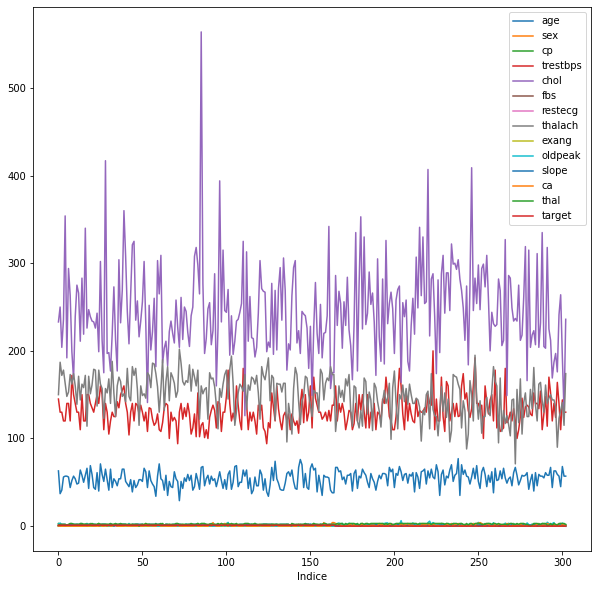

In [12]:
### Caracteristicas da base

df["Indice"] = df.index
df.plot(x="Indice", y=df[df.columns[:-1]].columns,
        kind="line", figsize=(10, 10))

df = df.drop('Indice',axis = 1)

In [13]:
features = df.columns[:-1]
df.loc[:, features].values

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [14]:
# obter apenas os valores 
features = df.columns[:-1] ## Retirada do Resultado                     
x = df.loc[:, features].values

# Normalizar valores 
X = StandardScaler().fit_transform(x) ## Valores Normalizados

pd.DataFrame(data = X, columns = features).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [15]:
# PCA
pca = PCA(2)
 
#Transform the data
pca_x = pca.fit_transform(X)

principalDf = pd.DataFrame(data = pca_x
             , columns = ['principal component 1', 'principal component 2'])


In [16]:
principalDf

,principal component 1,principal component 2
0,0.624111,2.321270
1,-0.455988,-0.957351
2,-1.828805,0.042885
3,-1.716006,-0.495337
4,-0.371356,0.301156
...,...,...
298,1.146672,-0.519529
299,-0.708593,-1.045752
300,2.459005,0.478262
301,1.762755,-2.336816


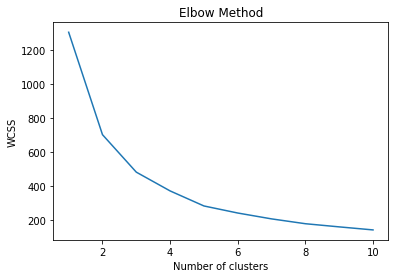

In [17]:
### Método do Elbow para encontrar a quantidade de clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=5)
    kmeans.fit(pca_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

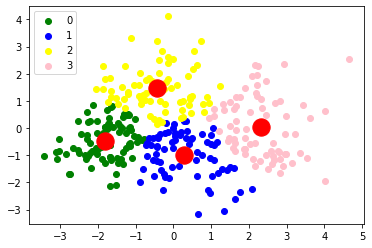

In [18]:
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(pca_x)
 
#Getting unique labels
u_labels = np.unique(label)

colors = np.array(["green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

#plotting the results:
for i in u_labels:
    plt.scatter(pca_x[label == i , 0] , pca_x[label == i , 1] , label = i, c=colors[i])

plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [46]:
kmeans.cluster_centers_

array([[-1.81775371, -0.46237905],
       [ 2.30947504,  0.05190172],
       [ 0.26272847, -0.91324318],
       [-0.46381493,  1.5345655 ]])

### Exemplo sem Normalizar

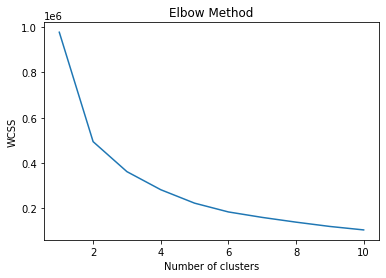

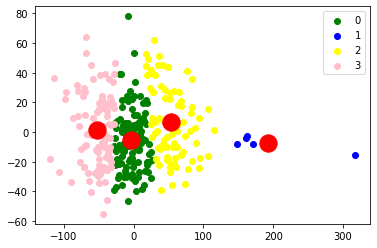

In [20]:
# PCA
pca = PCA(2)
 
#Transform the data
pca_x = pca.fit_transform(x)

### Método do Elbow para encontrar a quantidade de clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=5)
    kmeans.fit(pca_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(pca_x)
 
#Getting unique labels
u_labels = np.unique(label)

colors = np.array(["green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

#plotting the results:
for i in u_labels:
    plt.scatter(pca_x[label == i , 0] , pca_x[label == i , 1] , label = i, c=colors[i])

plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
